# Example rosbag

Read the rosbag with the following python scriptm, and print the topic names.

In [1]:
import rosbag
import matplotlib.pyplot as plt

bag_name = "gps_imu_2020-12-09_10-33.bag"
dir_name = "/mnt/c/bag/"

mybag = rosbag.Bag(dir_name + bag_name)
topics = mybag.get_type_and_topic_info()[1].keys()
print(topics)

['/gps/nova/inspvax', '/gps/duro/rollpitchyaw', '/gps/duro/current_pose', '/gps/nova/insstdev', '/gps/duro/odom', '/gps/nova/bestutm', '/gps/nova/current_pose', '/gps/duro/imu', '/gps/nova/inspva', '/gps/nova/imu', '/gps/nova/inscov', '/gps/nova/fix', '/gps/nova/heading2', '/gps/nova/bestvel', '/gps/nova/corrimudata', '/left_os1/os1_node/imu_packets', '/gps/duro/status_flag', '/gps/duro/status_string', '/gps/duro/fix', '/gps/nova/gps', '/left_os1/os1_cloud_node/imu']


Create a simple class to easily stopre xyz and time.

In [2]:
class xyz:  
    def __init__(self):  
        self.x = []  
        self.y = [] 
        self.z = []
        self.t = []

Read some data from the rosbag.

In [3]:
linear_acc_ouster = xyz()
linear_acc_duro = xyz()
linear_acc_nova = xyz()
angular_velo_ouster = xyz()
angular_velo_duro = xyz()
angular_velo_nova = xyz()
pose_nova = xyz()
pose_duro = xyz()
for topic, msg, t in mybag.read_messages():
    if topic == "/left_os1/os1_cloud_node/imu":
        linear_acc_ouster.x.append(msg.linear_acceleration.x)
        linear_acc_ouster.y.append(msg.linear_acceleration.y)
        linear_acc_ouster.z.append(msg.linear_acceleration.z)
        linear_acc_ouster.t.append(t.to_nsec())
        angular_velo_ouster.x.append(msg.angular_velocity.x)
        angular_velo_ouster.y.append(msg.angular_velocity.y)
        angular_velo_ouster.z.append(msg.angular_velocity.z)
        angular_velo_ouster.t.append(t.to_nsec())
    elif topic == "/gps/duro/imu":
        linear_acc_duro.x.append(msg.linear_acceleration.x)
        linear_acc_duro.y.append(msg.linear_acceleration.y)
        linear_acc_duro.z.append(msg.linear_acceleration.z)
        linear_acc_duro.t.append(t.to_nsec())
    elif topic == "/gps/nova/imu":
        linear_acc_nova.x.append(msg.linear_acceleration.x)
        linear_acc_nova.y.append(msg.linear_acceleration.y)
        linear_acc_nova.z.append(msg.linear_acceleration.z)
        linear_acc_nova.t.append(t.to_nsec())
    elif topic == "/gps/nova/current_pose":
        pose_nova.x.append(msg.pose.position.x)
        pose_nova.y.append(msg.pose.position.y)
    elif topic == "/gps/duro/current_pose":
        pose_duro.x.append(msg.pose.position.x)
        pose_duro.y.append(msg.pose.position.y)    

Plot the data.

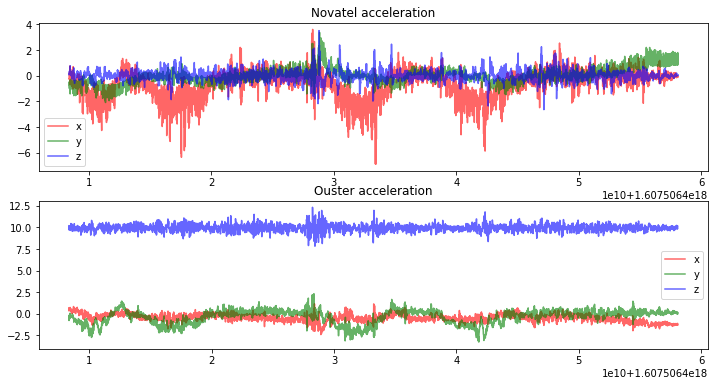

In [4]:
plt.figure(1, figsize=(12,6))
plt.subplot(211)
plt.title("Novatel acceleration")
plt.plot(linear_acc_nova.t, linear_acc_nova.x, "r", label = "x", alpha=0.6)
plt.plot(linear_acc_nova.t, linear_acc_nova.y, "g", label = "y", alpha=0.6)
plt.plot(linear_acc_nova.t, linear_acc_nova.z, "b", label = "z", alpha=0.6)
plt.legend()


plt.subplot(212)
plt.title("Ouster acceleration")
plt.plot(linear_acc_ouster.t, linear_acc_ouster.x, "r", label = "x", alpha=0.6)
plt.plot(linear_acc_ouster.t, linear_acc_ouster.y, "g", label = "y", alpha=0.6)
plt.plot(linear_acc_ouster.t, linear_acc_ouster.z, "b", label = "z", alpha=0.6)
plt.legend()

plt.show()

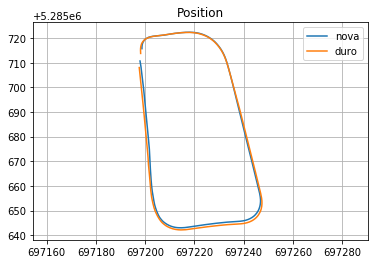

In [5]:
plt.title("Position")
plt.plot(pose_nova.x, pose_nova.y, label = "nova")
plt.plot(pose_duro.x, pose_duro.y, label = "duro")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()

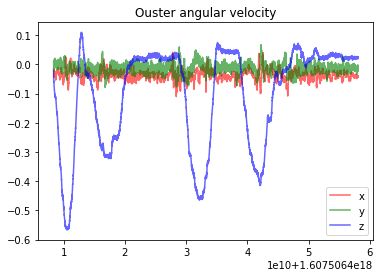

In [6]:
plt.title("Ouster angular velocity")
plt.plot(angular_velo_ouster.t, angular_velo_ouster.x, "r", label = "x", alpha=0.6)
plt.plot(angular_velo_ouster.t, angular_velo_ouster.y, "g", label = "y", alpha=0.6)
plt.plot(angular_velo_ouster.t, angular_velo_ouster.z, "b", label = "z", alpha=0.6)
plt.legend()
plt.show()